In [16]:
# python peripherals
import sys
from pathlib import Path
from typing import Callable
sys.path.append('../../.')

# torch
import torch

# matplotlib
import matplotlib
import matplotlib.pyplot
import matplotlib.axes

# deep-signature
from deep_signature.core.base import SeedableObject
from deep_signature.manifolds.planar_curves.implementation import PlanarCurvesManager, PlanarCurve
from deep_signature.manifolds.planar_curves.groups import EuclideanGroup, SimilarityGroup, EquiaffineGroup, AffineGroup
from deep_signature.core import discrete_distributions
from deep_signature.training import datasets
from deep_signature.training.networks import DeepSignaturesNet
from deep_signature.training.activations import Sine
from deep_signature.manifolds.planar_curves.evaluation import PlanarCurvesApproximatedSignatureComparator, PlanarCurvesShapeMatchingEvaluator
from deep_signature.manifolds.planar_curves.groups import EquiaffineGroup

SeedableObject.set_seed(seed=42)

In [17]:
planar_curves_manager = PlanarCurvesManager(curves_file_path=Path("C:/deep-signature-data/curves/train/curves.npy"))
# planar_curves_manager = PlanarCurvesManager(curves_file_path=Path("C:/deep-signature-data-new/curves/circles/curves.npy"))
# planar_curves_manager = PlanarCurvesManager(curves_file_path=Path("C:/deep-signature-data-new/curves/benchmark/2023-01-03-04-36-16/basketball/equiaffine/10/1_0/curves.npy"))
print(f'{planar_curves_manager.planar_curves_count} curves loaded')

98714 curves loaded


In [33]:
supporting_points_count = 13
sample_points = 2 * supporting_points_count + 1
sampling_ratio=1

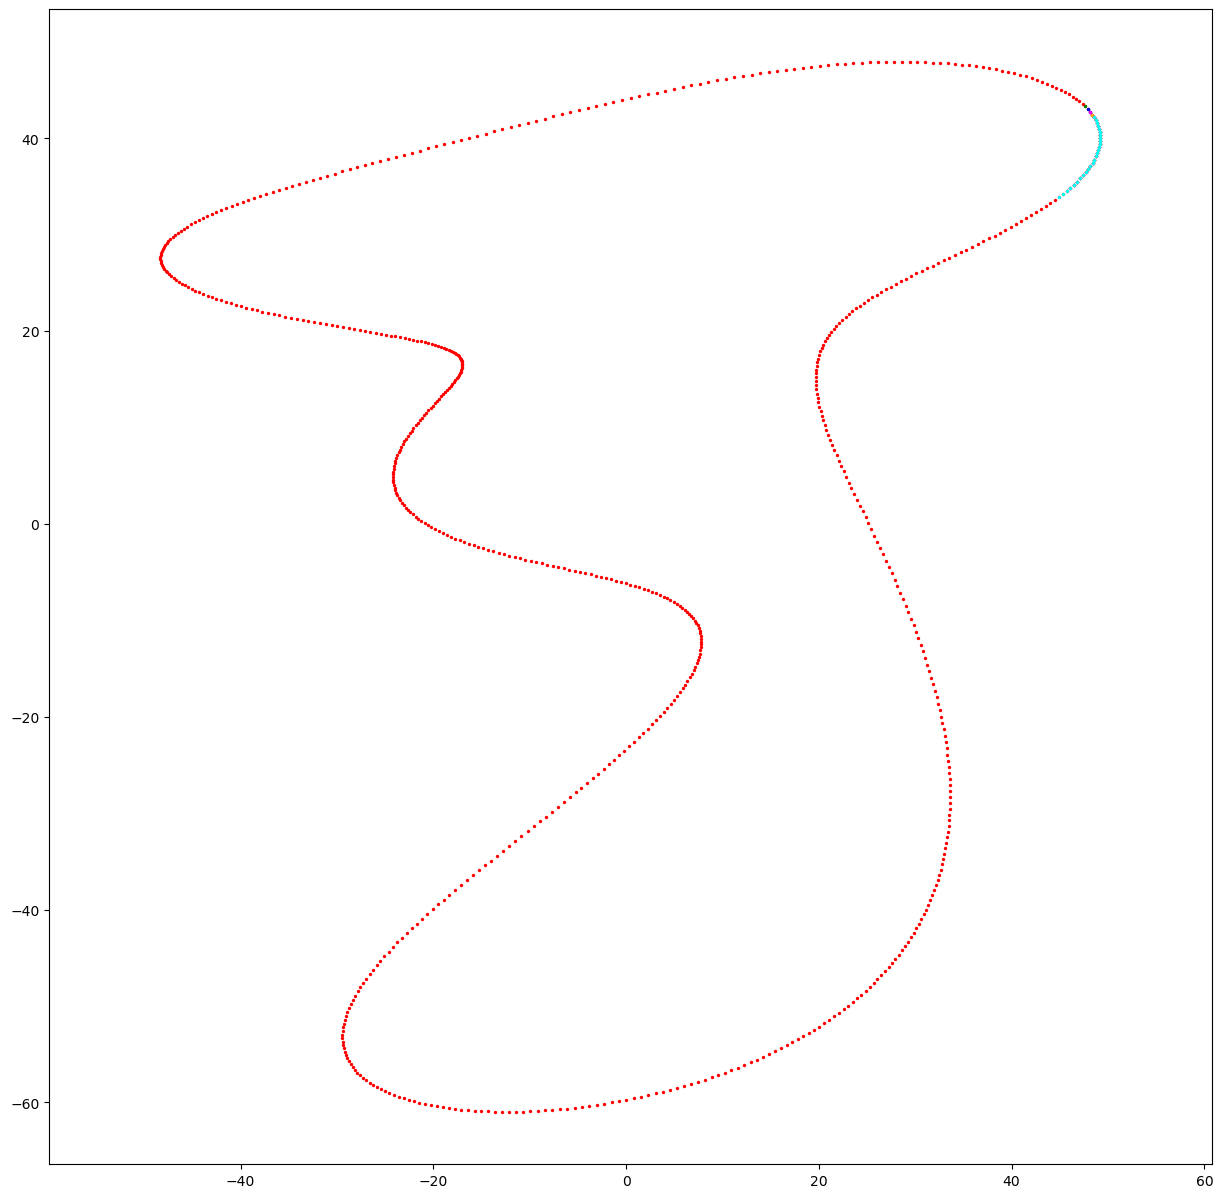

In [34]:
def handle_curve_plot(curve: PlanarCurve):
    discrete_distribution = discrete_distributions.MultimodalGaussianDiscreteDistribution(bins_count=curve.points_count, multimodality=10)
    curve = curve.sample_curve(sampling_ratio=sampling_ratio, discrete_distribution=discrete_distribution)
    # signature_curve = PlanarCurve(curve.approximate_curve_signature(model=model, supporting_points_count=supporting_points_count, device=device))

    fig1, ax = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(15, 15))
    curve.plot_scattered_curve(ax=ax)

    curve_neighborhoods = curve.extract_curve_neighborhoods(supporting_points_count=supporting_points_count)
    # for i in range(5):
    curve_neighborhoods[0].plot_scattered_curve(ax=ax, cmap='green')
    curve_neighborhoods[1].plot_scattered_curve(ax=ax, cmap='blue')
    curve_neighborhoods[2].plot_scattered_curve(ax=ax, cmap='magenta')
    curve_neighborhoods[3].plot_scattered_curve(ax=ax, cmap='orange')
    curve_neighborhoods[4].plot_scattered_curve(ax=ax, cmap='cyan')

    matplotlib.pyplot.show()


    # fig2, axes = matplotlib.pyplot.subplots(nrows=3, ncols=1, figsize=(40, 20))
    # signature_curve.plot_signature(model=model, supporting_points_count=supporting_points_count, device=device, ax=axes, line_style='-')
    # matplotlib.pyplot.show()
    # matplotlib.pyplot.close(fig1)
    # matplotlib.pyplot.close(fig2)

group = EquiaffineGroup(min_cond=2, max_cond=2, seed=43)
for i in range(0, 1):
    curve = planar_curves_manager.get_random_planar_curve()
    transformed_curve = curve.transform_curve(transform=group.generate_random_group_action())
    handle_curve_plot(curve=curve)
    # handle_curve_plot(curve=transformed_curve)

In [20]:
# comparator = PlanarCurvesApproximatedSignatureComparator(
#     model=model,
#     supporting_points_count=supporting_points_count,
#     device=device)
#
# shape_matching_evaluator = PlanarCurvesShapeMatchingEvaluator(
#     log_dir_path=Path("C:/deep-signature-data-new/notebooks_output"),
#     num_workers=18,
#     curves_count_per_collection=20,
#     curve_collections_file_names=['basketball', 'bats', 'birds', 'branches', 'bunnies', 'butterflies', 'cacti', 'cats', 'chickens', 'clouds', 'deers', 'dogs', 'fishes', 'flames', 'flies', 'fruits', 'glasses', 'hearts', 'horses', 'insects', 'jogging', 'leaves', 'monkies', 'pieces', 'shapes', 'whales', 'wings'],
#     benchmark_dir_path=Path('C:/deep-signature-data-new/curves/benchmark/2023-01-03-04-36-16'),
#     sampling_ratios=[0.7, 0.8, 0.9, 1.0],
#     multimodalities=[10],
#     group_names=['equiaffine'],
#     planar_curves_signature_comparator=comparator)
#
# shape_matching_evaluator.start()
# shape_matching_evaluator.join()
#
# print(shape_matching_evaluator.shape_matching_df)
# shape_matching_evaluator.shape_matching_df.to_csv("C:/deep-signature-data-new/notebooks_output/output.csv")